# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | newman
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | mizdah
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | puerto ayacucho
Processing Record 8 of Set 1 | fale old settlement
Processing Record 9 of Set 1 | nazyvayevsk
Processing Record 10 of Set 1 | mazagao
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | atafu village
Processing Record 13 of Set 1 | ust-nera
Processing Record 14 of Set 1 | plesetsk
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | novyy urengoy
Processing Record 17 of Set 1 | whitehorse
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | geraldton
Processing Record 20 of Set 1 | margate
Processing Record 21 of Set 1 | huaihua
Processing Record 22 of Set 1 | t

Processing Record 42 of Set 4 | praia da vitoria
Processing Record 43 of Set 4 | minas de marcona
Processing Record 44 of Set 4 | vredendal
Processing Record 45 of Set 4 | nanyuki
Processing Record 46 of Set 4 | chibougamau
Processing Record 47 of Set 4 | nuuk
Processing Record 48 of Set 4 | vail
Processing Record 49 of Set 4 | colonia
Processing Record 0 of Set 5 | bykovo
Processing Record 1 of Set 5 | ca mau
Processing Record 2 of Set 5 | saint-pierre
Processing Record 3 of Set 5 | mahdia
Processing Record 4 of Set 5 | severo-yeniseyskiy
Processing Record 5 of Set 5 | las khorey
Processing Record 6 of Set 5 | tarawa
Processing Record 7 of Set 5 | tha mai
Processing Record 8 of Set 5 | hollywood
Processing Record 9 of Set 5 | horta
Processing Record 10 of Set 5 | dolores
Processing Record 11 of Set 5 | tobi village
City not found. Skipping...
Processing Record 12 of Set 5 | kununurra
Processing Record 13 of Set 5 | nizhniy kuranakh
Processing Record 14 of Set 5 | naryn
Processing Reco

Processing Record 32 of Set 8 | sattahip
Processing Record 33 of Set 8 | dhidhdhoo
Processing Record 34 of Set 8 | makurazaki
Processing Record 35 of Set 8 | phillip island
Processing Record 36 of Set 8 | east honolulu
City not found. Skipping...
Processing Record 37 of Set 8 | kingscliff
Processing Record 38 of Set 8 | vertientes
Processing Record 39 of Set 8 | oban
Processing Record 40 of Set 8 | ambon
Processing Record 41 of Set 8 | tympaki
Processing Record 42 of Set 8 | yantarnyy
Processing Record 43 of Set 8 | zeya
Processing Record 44 of Set 8 | howard springs
Processing Record 45 of Set 8 | freetown
Processing Record 46 of Set 8 | kingston
Processing Record 47 of Set 8 | araban
Processing Record 48 of Set 8 | hinton
Processing Record 49 of Set 8 | bulgan
Processing Record 0 of Set 9 | laizhou
Processing Record 1 of Set 9 | medina
Processing Record 2 of Set 9 | broken hill
Processing Record 3 of Set 9 | devinuwara
City not found. Skipping...
Processing Record 4 of Set 9 | tofol


Processing Record 21 of Set 12 | novodvinsk
Processing Record 22 of Set 12 | prince george
Processing Record 23 of Set 12 | la sarre
Processing Record 24 of Set 12 | puerto lempira
Processing Record 25 of Set 12 | tokonou
Processing Record 26 of Set 12 | neiafu
Processing Record 27 of Set 12 | jolo
Processing Record 28 of Set 12 | lensk
Processing Record 29 of Set 12 | sept-iles
Processing Record 30 of Set 12 | ain beni mathar
City not found. Skipping...
Processing Record 31 of Set 12 | hualien city
Processing Record 32 of Set 12 | bloomingdale
Processing Record 33 of Set 12 | malvan
Processing Record 34 of Set 12 | priargunsk
Processing Record 35 of Set 12 | cacheu
Processing Record 36 of Set 12 | launceston
Processing Record 37 of Set 12 | quinte west
Processing Record 38 of Set 12 | faya-largeau
Processing Record 39 of Set 12 | dingwall
Processing Record 40 of Set 12 | nieuw amsterdam
Processing Record 41 of Set 12 | atherton
Processing Record 42 of Set 12 | muroto-misakicho
Process

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,15.29,63,75,2.57,CA,1691387596
1,newman,37.3138,-121.0208,28.99,59,0,1.79,US,1691387386
2,ushuaia,-54.8000,-68.3000,-3.96,94,99,2.30,AR,1691386970
3,mizdah,31.4451,12.9801,22.35,44,0,1.17,LY,1691387447
4,edinburgh of the seven seas,-37.0676,-12.3116,11.69,57,28,10.92,SH,1691387188


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col='City_ID')

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,15.29,63,75,2.57,CA,1691387596
1,newman,37.3138,-121.0208,28.99,59,0,1.79,US,1691387386
2,ushuaia,-54.8000,-68.3000,-3.96,94,99,2.30,AR,1691386970
3,mizdah,31.4451,12.9801,22.35,44,0,1.17,LY,1691387447
4,edinburgh of the seven seas,-37.0676,-12.3116,11.69,57,28,10.92,SH,1691387188


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

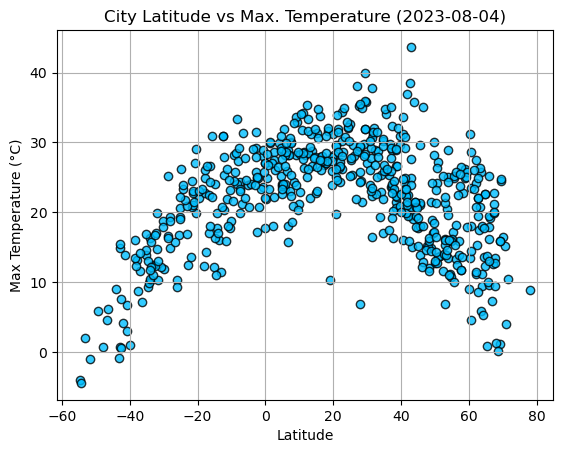

In [8]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
max_temp = city_data_df['Max Temp']
plt.scatter(latitude,max_temp, edgecolors='black', facecolors='deepskyblue', alpha=0.8)

# Incorporate the other graph properties
plt.grid()
plt.title('City Latitude vs Max. Temperature (2023-08-04)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

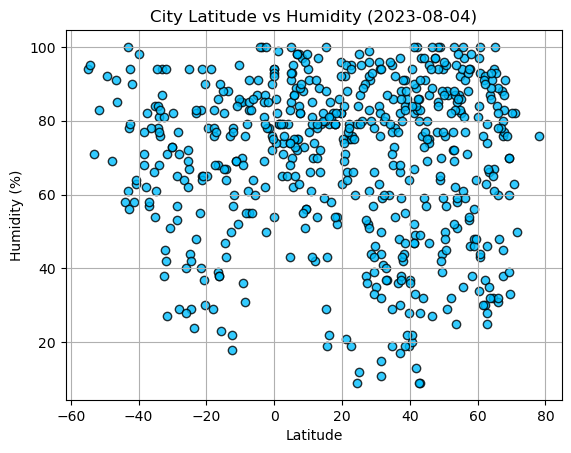

In [9]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df['Lat']
humidity = city_data_df['Humidity']
plt.scatter(latitude,humidity, edgecolors='black', facecolors='deepskyblue', alpha=0.8)

# Incorporate the other graph properties
plt.grid()
plt.title('City Latitude vs Humidity (2023-08-04)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

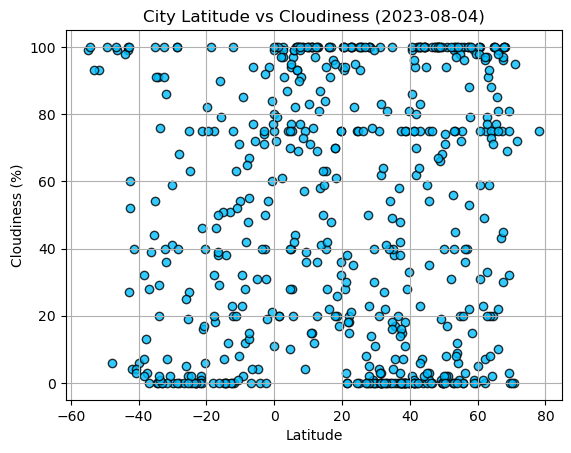

In [10]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df['Lat']
clouds = city_data_df['Cloudiness']
plt.scatter(latitude,clouds, edgecolors='black', facecolors='deepskyblue', alpha=0.8)

# Incorporate the other graph properties
plt.grid()
plt.title('City Latitude vs Cloudiness (2023-08-04)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

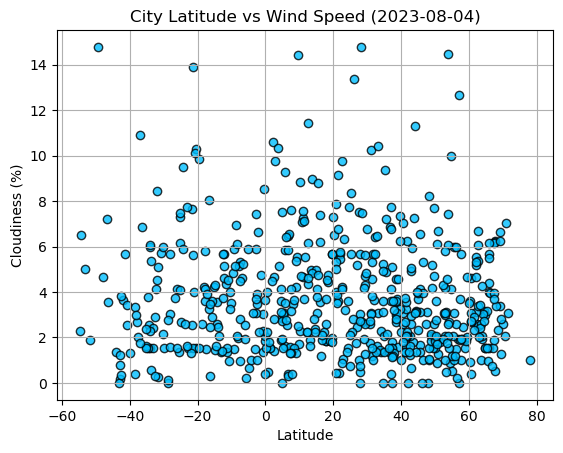

In [11]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df['Lat']
wind = city_data_df['Wind Speed']
plt.scatter(latitude,wind, edgecolors='black', facecolors='deepskyblue', alpha=0.8)

# Incorporate the other graph properties
plt.grid()
plt.title('City Latitude vs Wind Speed (2023-08-04)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def LinearRegression(x_col, y_col, eq_coord):
    r = st.pearsonr(x_col, y_col)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_col, y_col)
    regressvalues = slope * x_col + intercept
    line_equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
    plt.scatter(x_col, y_col, facecolors='deepskyblue', edgecolors='black',alpha=0.8 )
    plt.plot(x_col, regressvalues, 'r-')
    plt.title(f"{x_col.name} vs {y_col.name} (2023-08-04)")
    plt.ylabel(f"{y_col.name}")
    plt.xlabel(f"{x_col.name}")
    plt.annotate(line_equation, eq_coord, fontsize = 15, color='r')

    
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,15.29,63,75,2.57,CA,1691387596
1,newman,37.3138,-121.0208,28.99,59,0,1.79,US,1691387386
3,mizdah,31.4451,12.9801,22.35,44,0,1.17,LY,1691387447
6,puerto ayacucho,5.6639,-67.6236,23.44,95,97,1.63,VE,1691387599
8,nazyvayevsk,55.5698,71.3529,24.86,35,0,3.09,RU,1691387600


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ushuaia,-54.8000,-68.3000,-3.96,94,99,2.30,AR,1691386970
4,edinburgh of the seven seas,-37.0676,-12.3116,11.69,57,28,10.92,SH,1691387188
5,port-aux-francais,-49.3500,70.2167,5.92,92,100,14.78,TF,1691387598
7,fale old settlement,-9.3852,-171.2468,28.26,70,23,5.91,TK,1691387599
9,mazagao,-0.1150,-51.2894,27.03,94,11,1.83,BR,1691387601


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.5725744870305273


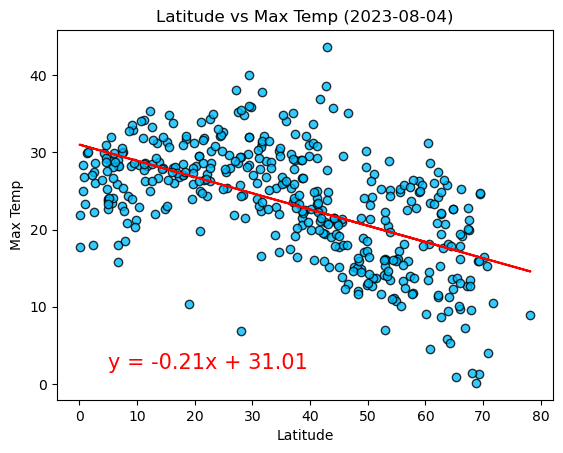

In [15]:
# Linear regression on Northern Hemisphere
LinearRegression(northern_hemi_df['Lat'].rename('Latitude'), northern_hemi_df['Max Temp'], (5,2))

The r-value is: 0.8132270051700864


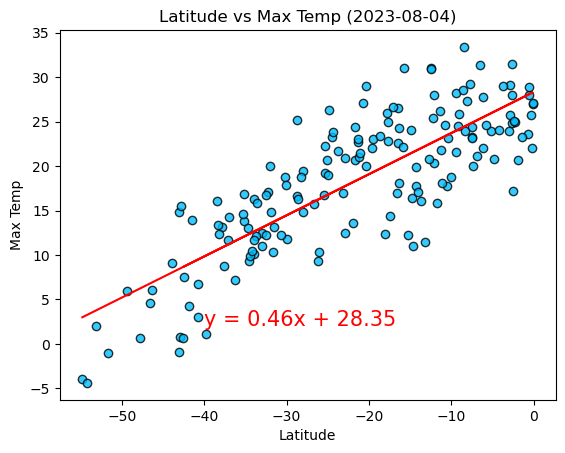

In [16]:
# Linear regression on Southern Hemisphere
LinearRegression(southern_hemi_df['Lat'].rename('Latitude'), southern_hemi_df['Max Temp'], (-40,2))

**Discussion about the linear relationship:** 

- There is a moderate negative correlation between latitude and maximum temperature in the northern hemisphere.

- There is a very high positive correlation between latitude and maximum temperature in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.10500928959950791


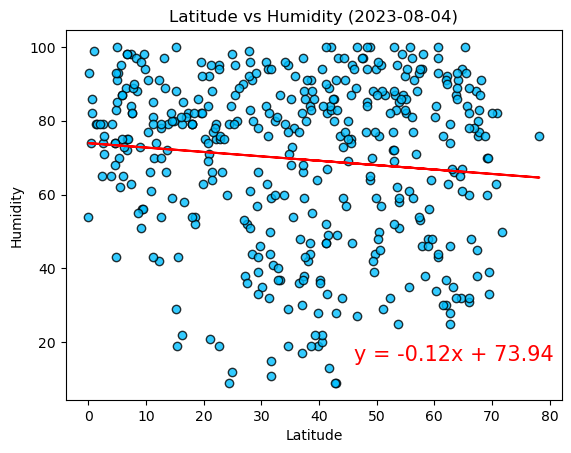

In [17]:
# Northern Hemisphere
LinearRegression(northern_hemi_df['Lat'].rename('Latitude'), northern_hemi_df['Humidity'], (46,15))

The r-value is: 0.0008140492477408911


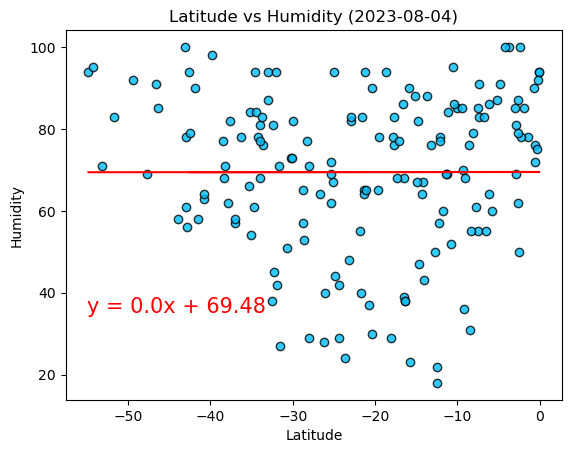

In [18]:
# Southern Hemisphere
LinearRegression(southern_hemi_df['Lat'].rename('Latitude'), southern_hemi_df['Humidity'], (-55,35))

**Discussion about the linear relationship:**

- There is very low negative correlation between the latitude and humidity in the northern hemisphere.

- There is almost no correlation between latitude and humidity in the southern hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.10238525250819695


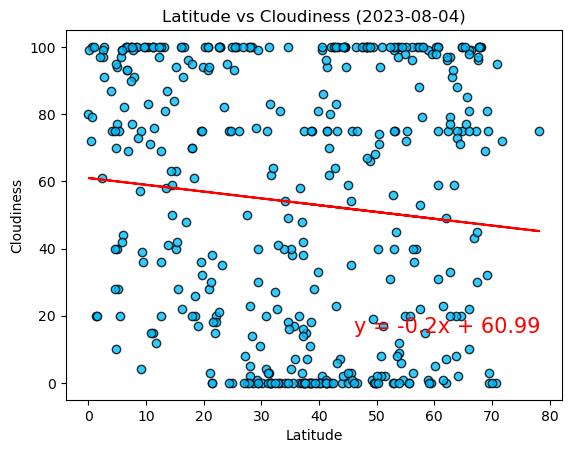

In [19]:
# Northern Hemisphere
LinearRegression(northern_hemi_df['Lat'].rename('Latitude'), northern_hemi_df['Cloudiness'], (46,15))

The r-value is: -0.0801901304645523


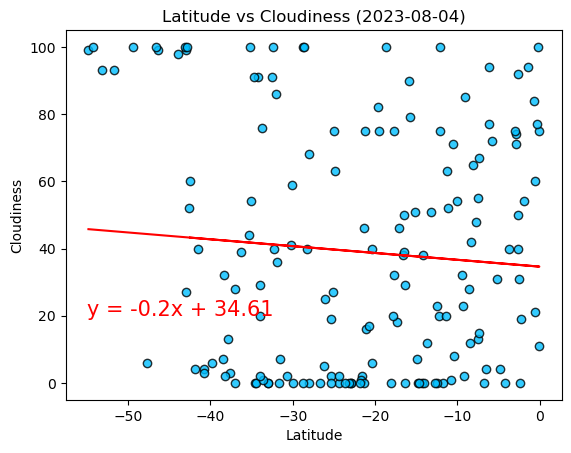

In [20]:
# Southern Hemisphere
LinearRegression(southern_hemi_df['Lat'].rename('Latitude'), southern_hemi_df['Cloudiness'], (-55,20))

**Discussion about the linear relationship:** 

- There is a very weak negative correlation between latitude and cloudiness in the northern hemisphere. It is so weak that there is little practical significance.

- Likewise, there is a very weak negative correlation between latitude and cloudiness in the southern hemisphere. Again, there is little practical significance for this correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.14273767148647967


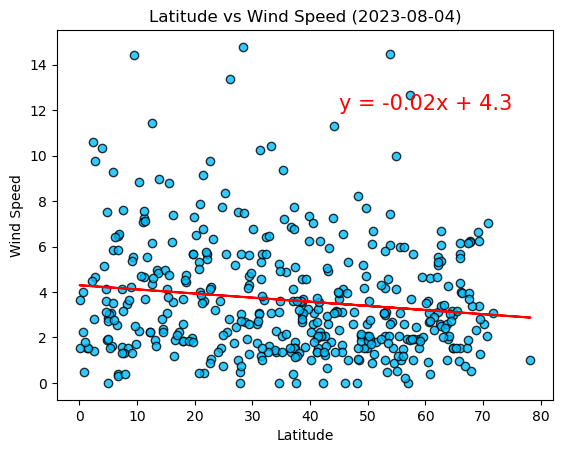

In [21]:
# Northern Hemisphere
LinearRegression(northern_hemi_df['Lat'].rename('Latitude'), northern_hemi_df['Wind Speed'], (45,12))

The r-value is: -0.016661824330081773


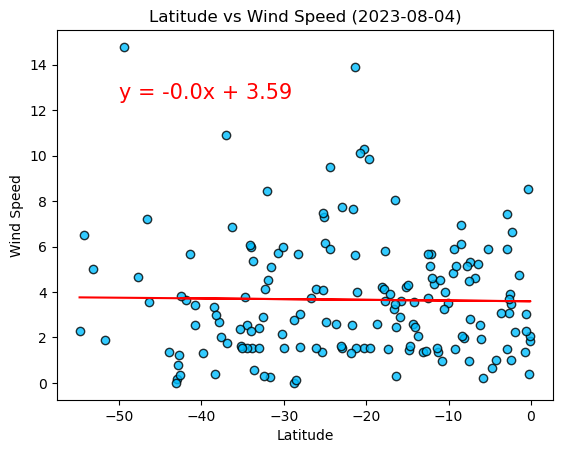

In [22]:
# Southern Hemisphere
LinearRegression(southern_hemi_df['Lat'].rename('Latitude'), southern_hemi_df['Wind Speed'], (-50,12.5))

**Discussion about the linear relationship:** 

- There is a negative and very low correlation between latitude and wind speed in the northern hemisphere.

- Similarly, there is a negative and very low correlation between latitude and wind speed in the southern hemisphere. This correlation is negligible. 